<a href="https://colab.research.google.com/github/paparrigopoul20/example/blob/main/Frozen_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install numpy scipy scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#imports
import scipy.io
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import joblib
from joblib import dump, load
import pickle
import pandas as pd

from PIL import Image
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input

from keras.applications.vgg16 import VGG16 
from keras.models import Model

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import statistics

In [ ]:
#import the classifiers fro sklearn
from sklearn import datasets, neighbors, linear_model
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier

# **Frozen transfer learning**

Experiments: Experimental settings

In [ ]:
# method partly taken from https://kapernikov.com/tutorial-image-classification-with-scikit-learn/


def resize_all(src, pklname, include):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata.The dictionary is written to a pickle file 
    named '{pklname}.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    include: set[str]
        set containing str
    """
     
    model = VGG16()
    model = Model(inputs = model.inputs, outputs = model.layers[-2].output) 
     
    data = dict()
    data['label'] = []
    data['filename'] = []
    data['data'] = []
    data['img'] = [] 

    pklname = f"{pklname}.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for file in os.listdir(src):
        if file[:5] in include:
          img = load_img(os.path.join(src, file), target_size=(224,224))
          img = np.array(img) 
          reshaped_img = img.reshape(1,224,224,3)
          imgx = preprocess_input(reshaped_img)
          features = model.predict(imgx, use_multiprocessing=True)
          data['label'].append(file[:5])
          data['filename'].append(file)
          data['data'].append(features)
          data['img'].append(img)
        
        joblib.dump(data, pklname)

# Papyri documents (paDOC)
Taken from http://www.pappal.info/sample/show/3957

The datset remains hidden during submission, because there is a rights issue that we are trying to resolve.


**Pappal documents**

Experimental settings

In [ ]:
#unzip the file with documentary images from https://www.baylor.edu/classics/index.php?id=958431
!unzip /content/PaDoc.zip

Archive:  /content/PaDoc.zip
   creating: pappal/
  inflating: pappal/1stAD_ P.Fouad 27.jpg  
  inflating: pappal/1stAD_BGU 4 1201.jpg  
  inflating: pappal/1stAD_BGU I 183.jpg  
  inflating: pappal/1stAD_CPR XV 2.jpg  
  inflating: pappal/1stAD_CPR XV 5.jpg  
  inflating: pappal/1stAD_HGV P.Gen. 2 90.png  
  inflating: pappal/1stAD_O.Ber. II 123.png  
  inflating: pappal/1stAD_O.Ber. II 125.png  
  inflating: pappal/1stAD_O.Ber. II 126.png  
  inflating: pappal/1stAD_P.Bon. 20.jpg  
  inflating: pappal/1stAD_P.Bon. 30.jpg  
  inflating: pappal/1stAD_P.Bon. 31.jpg  
  inflating: pappal/1stAD_P.Cair.Preis. 35.jpg  
  inflating: pappal/1stAD_P.Col. VIII 209.png  
  inflating: pappal/1stAD_P.Col. VIII 211.png  
  inflating: pappal/1stAD_P.Col. VIII 212.png  
  inflating: pappal/1stAD_P.Col. X 249.png  
  inflating: pappal/1stAD_P.Col. X 250.png  
  inflating: pappal/1stAD_P.Col. X 251.png  
  inflating: pappal/1stAD_P.Corn. Inv. I 11.jpg  
  inflating: pappal/1stAD_P.Corn. inv. I 30.jpg  

In [ ]:
# modify to fit your system 
data_path ='pappal/'

In [ ]:
base_name = 'PaDOC'
#Define the centuries we are interested in
include = {'3rdBC','2ndBC','1stBC','1stAD', '2ndAD', '3rdAD','4thAD','5thAD', '6thAD', '7thAD', '8thAD','9thAD'}

resize_all(data_path, pklname=base_name, include=include)

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (99840557 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (116601255 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (93639392 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (130844949 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:2800: DecompressionBombWarning: Image size (128929136 pixels) exceeds limit of 8947848

In [ ]:
#load the pkl file and check the contents of the dictionary
from collections import Counter
base_name="PaDOC"
doc_data =joblib.load(f'{base_name}.pkl')

print('number of samples: ', len(doc_data['data']))
print('keys: ', list(doc_data.keys()))
print('image shape: ', doc_data['data'][0].shape)
print('labels:', np.unique(doc_data['label']))
 
Counter(doc_data['label'])

number of samples:  3326
keys:  ['label', 'filename', 'data', 'img']
image shape:  (1, 4096)
labels: ['1stAD' '1stBC' '2ndAD' '2ndBC' '3rdAD' '3rdBC' '4thAD' '5thAD' '6thAD'
 '7thAD' '8thAD']


Counter({'1stAD': 341,
         '1stBC': 109,
         '2ndAD': 326,
         '2ndBC': 581,
         '3rdAD': 346,
         '3rdBC': 814,
         '4thAD': 297,
         '5thAD': 162,
         '6thAD': 257,
         '7thAD': 64,
         '8thAD': 29})

In [ ]:
# get a list of just the features
X_doc = np.array(doc_data['data'])
y_doc = np.array(doc_data['label'])
X_doc.shape

(3326, 1, 4096)

In [ ]:
#reshape so that there are 100 samples of 4096 vectors
X_doc = X_doc.reshape(-1,4096)
X_doc.shape

(3326, 4096)

In [ ]:
# normalizing
X_doc_digits = X_doc / X_doc.max()
y_doc_digits = y_doc

n_doc_samples = len(X_doc_digits)

Create three random train/test splits (80/20). 

In [ ]:
from sklearn.model_selection import train_test_split
X_dtrain1, X_dtest1, y_dtrain1, y_dtest1, file_dtrain1, file_dtest1 = train_test_split(X_doc_digits, y_doc_digits,doc_data["filename"], test_size=0.20)

In [ ]:
X_dtrain2, X_dtest2, y_dtrain2, y_dtest2, file_dtrain2, file_dtest2 = train_test_split(X_doc_digits, y_doc_digits,doc_data["filename"], test_size=0.20)

In [ ]:
X_dtrain3, X_dtest3, y_dtrain3, y_dtest3,file_dtrain3, file_dtest3 = train_test_split(X_doc_digits, y_doc_digits,doc_data["filename"], test_size=0.20)

In [ ]:
#Save the three train/test splits into a dictionary

VGG16_dtrain_test= {}
VGG16_dtrain_test['X_dtrain1']=(X_dtrain1)
VGG16_dtrain_test['X_dtest1']=(X_dtest1)
VGG16_dtrain_test['y_dtrain1']=(y_dtrain1)
VGG16_dtrain_test['y_dtest1']=(y_dtest1)
VGG16_dtrain_test['file_dtrain1']=(file_dtrain1)
VGG16_dtrain_test['file_dtest1']=(file_dtest1)

VGG16_dtrain_test['X_dtrain2']=(X_dtrain2)
VGG16_dtrain_test['X_dtest2']=(X_dtest2)
VGG16_dtrain_test['y_dtrain2']=(y_dtrain2)
VGG16_dtrain_test['y_dtest2']=(y_dtest2)
VGG16_dtrain_test['file_dtrain2']=(file_dtrain2)
VGG16_dtrain_test['file_dtest2']=(file_dtest2)

VGG16_dtrain_test['X_dtrain3']=(X_dtrain3)
VGG16_dtrain_test['X_dtest3']=(X_dtest3)
VGG16_dtrain_test['y_dtrain3']=(y_dtrain3)
VGG16_dtrain_test['y_dtest3']=(y_dtest3)
VGG16_dtrain_test['file_dtrain3']=(file_dtrain3)
VGG16_dtrain_test['file_dtest3']=(file_dtest3)

#write the dictionary to a pickle file
pklname = "VGGdoc_train_test.pkl"
joblib.dump(VGG16_dtrain_test, pklname)

['VGGdoc_train_test.pkl']

**Results**

In [ ]:
#Classification Cross Validation

classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]

for classifier in classifiers:
  #Create three models, one for each of the three randomly splitted train/test sets

  #get the name of each classifier
  name = classifier.__class__.__name__

  #train each classifier on the 1st training set and test it on the 1st test set  
  classifier.fit(X_dtrain1, y_dtrain1)
  #save the classifier
  dump(classifier, f'{name}1_VGGdoc.joblib')
  #test the classifier
  predicted1=classifier.predict(X_dtest1)
  rep1=classification_report(y_dtest1, predicted1,output_dict=True)
  
  #train each classifier on the 2nd training set and test it on the 2nd test set
  classifier.fit(X_dtrain2, y_dtrain2)
  #save the classifier
  dump(classifier, f'{name}2_VGGdoc.joblib')
  #test the classifier
  predicted2=classifier.predict(X_dtest2)
  rep2=classification_report(y_dtest2, predicted2,output_dict=True)
  
  #train each classifier on the 3rd training set and test it on the 3rd test set
  classifier.fit(X_dtrain3, y_dtrain3)
  #save the classifier
  dump(classifier, f'{name}3_VGGdoc.joblib') 
  #test the classifier
  predicted3=classifier.predict(X_dtest3)
  rep3=classification_report(y_dtest3, predicted3,output_dict=True)

  #print the name of each classifier along with its three classification reports and compute their mean scores
  df = pd.DataFrame([rep1,rep2,rep3],index=['rep1', 'rep2', 'rep3'])
  lis=[]
  for i in df:
    lis.append(pd.DataFrame(df[i].apply(pd.Series)))

  report=pd.DataFrame()
  for i in lis:
    a=i.mean()
    report=report.append(a,ignore_index=True)
  report=report.rename(columns={report.columns[4]: "mean score"})
  report=report.drop(columns=['support'])
  report.index= [i for i in df.columns] 

  print("********************************")
  print(name,)
  print("********************************")
  print(report)
  print("********************************")
  print(rep1)
  print(rep2)
  print(rep3)

  #save the reports into an excel file
  report.to_excel("document_outputs.xlsx",
                      sheet_name=name)
  

********************************
KNeighborsClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.347654   0.253882  0.554705         NaN
1stBC         0.308018   0.326984  0.302162         NaN
2ndAD         0.219089   0.205250  0.237432         NaN
2ndBC         0.699275   0.657383  0.747161         NaN
3rdAD         0.277144   0.276948  0.277485         NaN
3rdBC         0.680070   0.877589  0.555579         NaN
4thAD         0.332576   0.343875  0.322619         NaN
5thAD         0.305061   0.352485  0.271784         NaN
6thAD         0.491697   0.562646  0.438702         NaN
7thAD         0.241624   0.505556  0.161111         NaN
8thAD         0.261953   0.622222  0.191667         NaN
accuracy           NaN        NaN       NaN     0.46997
macro avg     0.378560   0.453166  0.369128         NaN
weighted avg  0.481963   0.534655  0.469970         NaN
********************************
{'1stAD': {'precision': 0.28057553956834

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
SVC
********************************
              f1-score  precision    recall  mean score
1stAD         0.411837   0.405034  0.421068         NaN
1stBC         0.063704   0.666667  0.033497         NaN
2ndAD         0.187543   0.197484  0.178603         NaN
2ndBC         0.719532   0.668986  0.778791         NaN
3rdAD         0.346497   0.296788  0.417251         NaN
3rdBC         0.741904   0.689654  0.805154         NaN
4thAD         0.380769   0.382299  0.380159         NaN
5thAD         0.420756   0.563082  0.336756         NaN
6thAD         0.498369   0.624208  0.416361         NaN
7thAD         0.051282   0.333333  0.027778         NaN
8thAD         0.000000   0.000000  0.000000         NaN
accuracy           NaN        NaN       NaN    0.528028
macro avg     0.347472   0.438867  0.345038         NaN
weighted avg  0.506433   0.520244  0.528028         NaN
********************************
{'1stAD': {'precision': 0.4375, 'recall': 0.4307692307692

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
RandomForestClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.369173   0.366367  0.375511         NaN
1stBC         0.121457   0.666667  0.066993         NaN
2ndAD         0.179989   0.233841  0.146311         NaN
2ndBC         0.685371   0.617485  0.770195         NaN
3rdAD         0.313570   0.294949  0.337427         NaN
3rdBC         0.673812   0.562032  0.843940         NaN
4thAD         0.353912   0.385223  0.328571         NaN
5thAD         0.190210   0.407407  0.124091         NaN
6thAD         0.335128   0.637967  0.227615         NaN
7thAD         0.000000   0.000000  0.000000         NaN
8thAD         0.207407   0.666667  0.125000         NaN
accuracy           NaN        NaN       NaN    0.493994
macro avg     0.311821   0.439873  0.304150         NaN
weighted avg  0.452100   0.473988  0.493994         NaN
********************************
{'1stAD': {'precision': 0.409836065573

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
GaussianProcessClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.399164   0.331760  0.502564         NaN
1stBC         0.253859   0.766667  0.152841         NaN
2ndAD         0.214142   0.300437  0.167566         NaN
2ndBC         0.685299   0.597308  0.803810         NaN
3rdAD         0.338799   0.299452  0.390643         NaN
3rdBC         0.748277   0.750275  0.747442         NaN
4thAD         0.388911   0.387302  0.391667         NaN
5thAD         0.338579   0.517857  0.251564         NaN
6thAD         0.527797   0.649579  0.446837         NaN
7thAD         0.134454   0.500000  0.077778         NaN
8thAD         0.654040   1.000000  0.491667         NaN
accuracy           NaN        NaN       NaN    0.531031
macro avg     0.425756   0.554603  0.402216         NaN
weighted avg  0.516461   0.545722  0.531031         NaN
********************************
{'1stAD': {'precision': 0.366666666

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


********************************
MLPClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.453561   0.444390  0.466266         NaN
1stBC         0.348037   0.440883  0.292861         NaN
2ndAD         0.292765   0.315186  0.275353         NaN
2ndBC         0.743933   0.706436  0.789486         NaN
3rdAD         0.373817   0.362116  0.388304         NaN
3rdBC         0.775090   0.777421  0.773182         NaN
4thAD         0.458323   0.430407  0.492063         NaN
5thAD         0.413770   0.432451  0.400334         NaN
6thAD         0.503611   0.540836  0.473086         NaN
7thAD         0.273203   0.399074  0.211111         NaN
8thAD         0.633700   0.877778  0.508333         NaN
accuracy           NaN        NaN       NaN    0.567568
macro avg     0.479074   0.520634  0.460944         NaN
weighted avg  0.562858   0.565771  0.567568         NaN
********************************
{'1stAD': {'precision': 0.41333333333333333, 'r

Compute MAE and MSE

In [ ]:
#To compute the mean absolute and the mean squared error we must convert string values in ground truth (y_dtests) and in predictions to numeric ones

#Convert to numeric values
def to_numeric(array):
  
  #create a dictionary with keys the string values and values their corresponding numeric values
  dictionary = dict(zip(('3rdBC','2ndBC','1stBC','1stAD', '2ndAD', '3rdAD','4thAD','5thAD', '6thAD', '7thAD', '8thAD','9thAD'), (-3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9)))
  
  #Convert the strings to numbers using the dictionary and add the new values into a list
  numbers=[]
  for i in array:
    i=dictionary[i]
    numbers.append(i)
  #convert the list with the numeric values into an array
  array=np.array(numbers)
  return array

#Use the above function to convert the ground truth (y_dtests) to numeric values
y_num_dtest1=to_numeric(y_dtest1)
y_num_dtest2=to_numeric(y_dtest2)
y_num_dtest3=to_numeric(y_dtest3)

In [ ]:
# Compute mean absolute and mean squared error

classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]
        
mean_errors=pd.DataFrame()

for classifier in classifiers:
   #Create three models, one for each of the three randomly splitted train/test sets

   #get the name of each classifier
   name = classifier.__class__.__name__

   #print the name of each classifier along with its three classification reports and compute their mean accuracy score
   
   clf= load(f'{name}1_VGGdoc.joblib')
   predicted1=clf.predict(X_dtest1)
   #convert the predicted values to numeric using the "to numeric" function
   predicted1=to_numeric(predicted1)
   MAE1=mean_absolute_error(y_num_dtest1, predicted1)
   MSE1=mean_squared_error(y_num_dtest1, predicted1)

   clf= load(f'{name}2_VGGdoc.joblib') 
   predicted2=clf.predict(X_dtest2)
   predicted2=to_numeric(predicted2)
   MAE2=mean_absolute_error(y_num_dtest2, predicted2)
   MSE2=mean_squared_error(y_num_dtest2, predicted2)
       
   clf= load(f'{name}3_VGGdoc.joblib')  
   predicted3=clf.predict(X_dtest3)
   predicted3=to_numeric(predicted3)
   MAE3=mean_absolute_error(y_num_dtest3, predicted3)
   MSE3=mean_squared_error(y_num_dtest3, predicted3)

   #compute the mean absolute and the mean squared error of the three models
   MAE=statistics.mean([MAE1,MAE2,MAE3])
   MSE=statistics.mean([MSE1,MSE2,MSE3])
    
   mean_errors.insert(0,classifier.__class__.__name__, [MAE, MSE], True )
    
   print("********************************")
   print(name,)

   print(f"Mean Absolute Error:{MAE}")
   print(f"Mean Squared Error:{MSE}")

   print(f"MAE1:{MAE1}, MAE2:{MAE2}, MAE3:{MAE3}")
   print(f"MSE1:{MSE1}, MSE2:{MSE2}, MSE3:{MSE3}")
  
mean_errors=mean_errors.rename(index={0: "MAE", 1: "MSE"})
print(mean_errors)

#save the outputs to the excel file
with pd.ExcelWriter("document_savedoutputs.xlsx", engine='openpyxl', mode='a') as writer:
      mean_errors.to_excel(writer,
                      sheet_name="mean_errors")

In [ ]:
mean_errors

,MLPClassifier,GaussianProcessClassifier,RandomForestClassifier,DecisionTreeClassifier,SVC,KNeighborsClassifier
MAE,1.323323,1.523023,1.912412,2.637638,1.516016,1.656657
MSE,6.263263,7.476977,10.875375,14.702703,7.621121,7.668669


**Analysis**

Learning Curves

In [ ]:
#You can download the saved classifiers and the dictionary with the traing/test splits from here
!gdown --id 1BiVROngdvxFrvy1BjLwUO-R5VmQYWv7s

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1BiVROngdvxFrvy1BjLwUO-R5VmQYWv7s
To: /content/VGGdoc.zip
100% 1.70G/1.70G [00:32<00:00, 52.4MB/s]


In [ ]:
%%capture
!unzip VGGdoc.zip

In [ ]:
#load the dictionary with the three training/test splits
VGG16_dtrain_test =joblib.load('VGGdoc_train_test.pkl')

In [ ]:
X_dtrain1, X_dtest1, y_dtrain1, y_dtest1=VGG16_dtrain_test['X_dtrain1'], VGG16_dtrain_test['X_dtest1'],VGG16_dtrain_test['y_dtrain1'], VGG16_dtrain_test['y_dtest1']

In [ ]:
X_dtrain2, X_dtest2, y_dtrain2, y_dtest2=VGG16_dtrain_test['X_dtrain2'], VGG16_dtrain_test['X_dtest2'],VGG16_dtrain_test['y_dtrain2'], VGG16_dtrain_test['y_dtest2']

In [ ]:
X_dtrain3, X_dtest3, y_dtrain3, y_dtest3=VGG16_dtrain_test['X_dtrain3'], VGG16_dtrain_test['X_dtest3'],VGG16_dtrain_test['y_dtrain3'], VGG16_dtrain_test['y_dtest3']

In [ ]:
#training curves

classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]

train_size=[500, 1000, 1500, 2000, len(X_dtrain1)]
#create a list to add classifiers' names
clf_name=[]
#create a list to add smaller lists, each of which will contain one's classifier accuracy scores
accuracy=[]

for clf in classifiers:
  #add the name of the classifier to the clf_name list
  clf_name.append(clf.__class__.__name__)
  #create an empty list to append the classifier's accuracy scores
  clf_acc=[]
  for size in train_size:

    #train three models(one for each of the three training-test splits) with the corresponding size of their training set 
    #and test them on their whole test set. 
    clf.fit(X_dtrain1[:size], y_dtrain1[:size])
    predictions1=clf.predict(X_dtest1)
    #compute the accuracy score of the classifier
    ac1=accuracy_score(y_dtest1, predictions1)

    #do the same for the other two models    
    clf.fit(X_dtrain2[:size], y_dtrain2[:size])
    predictions2=clf.predict(X_dtest2)
    ac2=accuracy_score(y_dtest2, predictions2)

    clf.fit(X_dtrain3[:size], y_dtrain3[:size]) 
    predictions3=clf.predict(X_dtest3)
    ac3=accuracy_score(y_dtest3, predictions3)

    #add into the clf_acc list the mean accuracy score of the three models
    clf_acc.append(statistics.mean([ac1,ac2,ac3]))
    
  #add the clf_acc list with the mean accuracy scores of the classifier to the accuracy list
  accuracy.append(clf_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


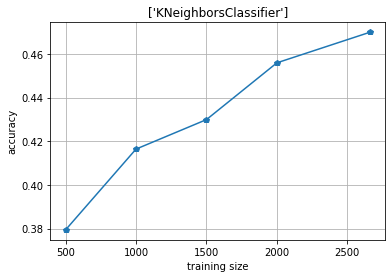

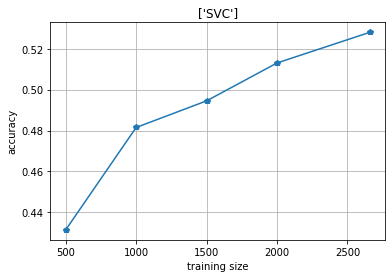

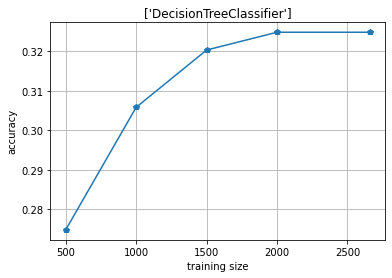

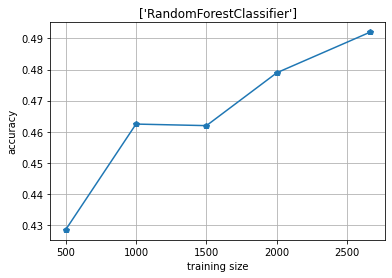

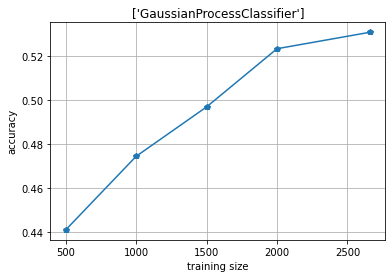

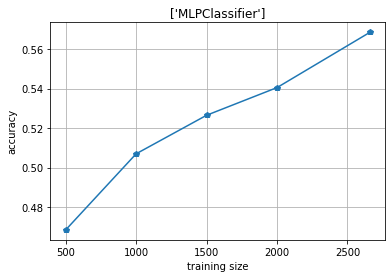

In [ ]:
#for each of the six classifiers make a plot with its learning curve
for i in range(6):
  x = train_size
  y=accuracy[i]

  #plt.plot(x, y, 'ro')
  fig, ax = plt.subplots()
  ax.plot(x, y, '-p')

  ax.set(xlabel='training size', ylabel='accuracy',
        title=[clf_name[i]])
  ax.grid()

  plt.show()  

In [ ]:
#create a dataframe with the classifiers accuracy scores as columns and training size as rows
fnames=[]
for i in range(len(classifiers)):
  lc=pd.DataFrame(accuracy[i],columns=[clf_name[i]],index=[l for l in train_size])
  fnames.append(lc)
learning_curves= pd.concat([f for f in fnames], axis=1)

#add the scores to the excel file
with pd.ExcelWriter("document_savedoutputs .xlsx", engine='openpyxl', mode='a') as writer:
  learning_curves.to_excel(writer,
                           sheet_name="learning curves")

In [ ]:
learning_curves

,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier,GaussianProcessClassifier,MLPClassifier
500,0.379379,0.431431,0.274775,0.428428,0.440941,0.468468
1000,0.416416,0.481481,0.305806,0.462462,0.474474,0.507007
1500,0.429930,0.494494,0.320320,0.461962,0.496997,0.526527
2000,0.455956,0.513013,0.324825,0.478979,0.523524,0.540541
2660,0.469970,0.528028,0.324825,0.491992,0.531031,0.568569


In [ ]:
#training curves

classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]

train_size=[500, 1000, 1500, 2000, len(X_dtrain1)]
#create a list to add classifiers' names
new_clf_name=[]
#create a list to add smaller lists, each of which will contain one's classifier accuracy scores
new_accuracy=[]

for clf in classifiers:
  #add the name of the classifier to the new_clf_name list
  new_clf_name.append(clf.__class__.__name__)
  #create an empty list to append the classifier's accuracy scores
  new_clf_acc=[]
  for size in train_size:

    #train three models(one for each of the three training-test splits) with the corresponding size of their training set 
    #and test them on the same training set. 
    clf.fit(X_dtrain1[:size], y_dtrain1[:size])
    predictions1=clf.predict(X_dtrain1[:size])
    #compute the accuracy score of the classifier
    ac1=accuracy_score(y_dtrain1[:size], predictions1)

    #do the same for the other two models    
    clf.fit(X_dtrain2[:size], y_dtrain2[:size])
    predictions2=clf.predict(X_dtrain2[:size])
    ac2=accuracy_score(y_dtrain2[:size], predictions2)

    clf.fit(X_dtrain3[:size], y_dtrain3[:size]) 
    predictions3=clf.predict(X_dtrain3[:size])
    ac3=accuracy_score(y_dtrain3[:size], predictions3)

    #add into the new_clf_acc list the mean accuracy score of the three models
    new_clf_acc.append(statistics.mean([ac1,ac2,ac3]))
    
  #add the new_clf_acc list with the mean accuracy scores of the classifier to the new_accuracy list
  new_accuracy.append(new_clf_acc)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


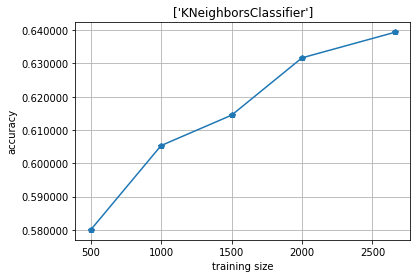

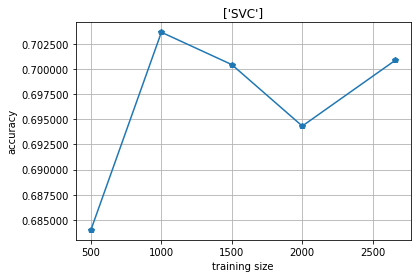

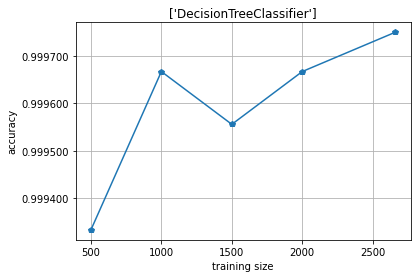

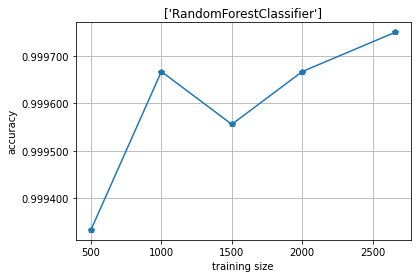

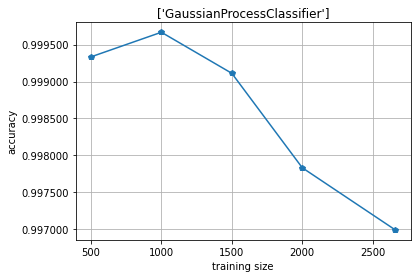

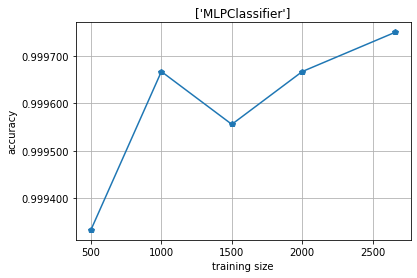

In [ ]:
#for each of the six classifiers make a plot with its learning curve
for i in range(6):
  x = train_size
  y=new_accuracy[i]
 
  #plt.plot(x, y, 'ro')
  fig, ax = plt.subplots()
  ax.plot(x, y, '-p')
  #Define the decimal spaces for y axis
  ax.yaxis.set_major_formatter(FormatStrFormatter('%.6f'))

  ax.set(xlabel='training size', ylabel='accuracy',
        title=[new_clf_name[i]])
  ax.grid()

  plt.show()  

In [ ]:
#create a dataframe with the classifiers accuracy scores as columns and training size as rows
fnames=[]
for i in range(len(classifiers)):
  lc=pd.DataFrame(new_accuracy[i],columns=[new_clf_name[i]],index=[l for l in train_size])
  fnames.append(lc)
new_learning_curves= pd.concat([f for f in fnames], axis=1)

#add the scores to the excel file
with pd.ExcelWriter("document_savedoutputs .xlsx", engine='openpyxl', mode='a') as writer:
  new_learning_curves.to_excel(writer,
                               sheet_name="new_learning curves")

In [ ]:
new_learning_curves

,KNeighborsClassifier,SVC,DecisionTreeClassifier,RandomForestClassifier,GaussianProcessClassifier,MLPClassifier
500,0.580000,0.684000,0.999333,0.999333,0.999333,0.999333
1000,0.605333,0.703667,0.999667,0.999667,0.999667,0.999667
1500,0.614444,0.700444,0.999556,0.999556,0.999111,0.999556
2000,0.631667,0.694333,0.999667,0.999667,0.997833,0.999667
2660,0.639348,0.700877,0.999749,0.999749,0.996992,0.999749


# For the questionnaire formation 

In [ ]:
classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]

In [ ]:
#Find the images that all classifiers fail to classificate correctly
#Model1

#create an empty list to include for each classifier a list with the filenames of wrongly classificated images 
files1=[]
for cls in classifiers:
  cls.fit(X_dtrain1, y_dtrain1)
  #for each classifier create a list in which the filenames of the images failed to be classified correctly will be added
  file_cls=[]
  #Use the X_dtest to make predictions and check whether the predictions are correct
  for i in range(len(X_dtest1)):
    x = X_dtest1[i]
    y = y_dtest1[i]
    prediction = cls.predict([x])[0]
    #If the prediction for an image is not correct, add its filename to the file_cls list
    if y != prediction: 
      file_cls.append(file_dtest1[i])
  #Add the file_cls list to the files list  
  files1.append(file_cls)  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#find the number of the lists contained in files list
len(files1)

6

In [ ]:
#intersect all six lists to find the common filenames of the wrongly classificated images
#intersection method from https://stackoverflow.com/questions/28061223/python-how-to-find-common-values-in-three-lists/28061246

wrong_files1=list(set(files1[0]).intersection(files1[1], files1[2],files1[3],files1[4],files1[5]))
wrong_files1

['1stAD_P.Fay. 111.png',
 '2ndAD_P.Oxy.XXXVIII 2874.jpg',
 '3rdAD_P.Oxy.XVII 2107.jpg',
 '1stBC_P.Bingen 45.jpg',
 '5thAD_P.Oxy.XLIX 3481.jpg',
 '2ndBC_SB XXIV 16054.jpg',
 '1stAD_P.Iand. III 26.png',
 '4thAD_P.Oxy.XLIV 3187.jpg',
 '3rdAD_P.Oxy. XII 1525.jpg',
 '2ndBC_P.B.U.G.inv. 187.png',
 '4thAD_P.Oxy.LX 4082.jpg',
 '5thAD_P.Oxy.LV 3796.jpg',
 '5thAD_P.Oxy.LXIII 4388.jpg',
 '3rdAD_P.Princ. II 61.png',
 '6thAD_P.Cair.Masp. 3 67312(3).jpg',
 '6thAD_P.Oxy.XVI.1987.jpg',
 '6thAD_P.Cair.Masp.II.67157.jpg',
 '1stAD_SB VI 9291.png',
 '4thAD_P.Oxy.XXXVI 2765.jpg',
 '4thAD_P.Cair.Isid.41(1).jpg',
 '5thAD_SB XXVI 16734 R(2).jpg',
 '3rdAD_P.Mich.inv. 5474; Recto(1).jpg',
 '7thAD_P.Oxy.XXIV 2420(1).jpg',
 '3rdAD_P.Gen. I (2e éd.) 42.png',
 '6thAD_P.Cair.Masp.III.67302(1).jpg',
 '6thAD_P.Oxy.LXIII 4398(1).jpg',
 '6thAD_CPR VIII 61(1).jpg',
 '1stAD_VBP VI 170.jpg',
 '1stBC_P.Mich.inv. 3279; Verso(2).jpg',
 '2ndBC_P.Mich.inv. 3235; Recto.jpg',
 '3rdBC_P.Mich.inv. 6955(2).jpg',
 '6thAD_P.Hamb. I 23

In [ ]:
#Do the same for the other two models
#Model2

files2=[]
for cls in classifiers:
  cls.fit(X_dtrain2, y_dtrain2)
  file_cls=[]
  for i in range(len(X_dtest2)):
    x = X_dtest2[i]
    y = y_dtest2[i]
    prediction = cls.predict([x])[0]
    if y != prediction: 
      file_cls.append(file_dtest2[i])  
  files2.append(file_cls)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
wrong_files2=list(set(files2[0]).intersection(files2[1], files2[2],files2[3],files2[4],files2[5]))
wrong_files2

['4thAD_P.Oxy.LV 3788.jpg',
 '3rdAD_P.Fay.85.jpg',
 '2ndAD_P.Oxy.LX 4060(3).jpg',
 '2ndBC_SB XXIV 16054.jpg',
 '5thAD_SPP XX 121.jpg',
 '3rdAD_P.Mich.inv. 6167; Recto.jpg',
 '1stAD_P.Tebt. 2 410 R.png',
 '2ndBC_P.Phrur. Diosk. 5(2).jpg',
 '4thAD_SB XXII 15627.jpg',
 '2ndAD_P.Mich.inv. 2841; Recto.jpg',
 '5thAD_P.Oxy.LXIII 4388.jpg',
 '6thAD_SB XVIII 13297.jpg',
 '3rdBC_P.Lond. VII 1974.jpg',
 '5thAD_P.Oxy.XVI 1959.jpg',
 '1stAD_SB VI 9291.png',
 '5thAD_P.Oxy.LXVIII 4677.jpg',
 '1stBC_SB XVI 12321.gif',
 '6thAD_CPR X 127.jpg',
 '1stAD_P.Mich.inv. 104.jpg',
 '5thAD-P.Oxy.LXXII 4911.jpg',
 '3rdAD_P.Gen. I (2e éd.) 42.png',
 '4thAD_P.Panop. 29.jpg',
 '5thAD_P.Oxy.XVI.1948(2).jpg',
 '6thAD_P.Cair.Masp.III.67302(1).jpg',
 '2ndAD_SB XXII 15342.jpg',
 '3rdBC_P.Yale I 32Letter from Leodamas.jpg',
 '1stAD_VBP VI 170.jpg',
 '4thAD_P.Oxy.XLIII 3143.jpg',
 '3rdBC_P.Mich. 1 38.jpg',
 '7thAD_P.Oxy.LVIII 3960(1).jpg',
 '4thAD_P.Oxy.LXXII 4900.jpg',
 '3rdBC_P.Mich.inv. 6955(2).jpg',
 '6thAD_P.Hamb. I 2

In [ ]:
#Model3

files3=[]
for cls in classifiers:
  cls.fit(X_dtrain3, y_dtrain3)
  file_cls=[]
  for i in range(len(X_dtest3)):
    x = X_dtest3[i]
    y = y_dtest3[i]
    prediction = cls.predict([x])[0]
    if y != prediction: 
      file_cls.append(file_dtest3[i])  
  files3.append(file_cls)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
wrong_files3=list(set(files3[0]).intersection(files3[1], files3[2],files3[3],files3[4],files3[5]))
wrong_files3

['4thAD_P.Oxy.LV 3788.jpg',
 '8thAD_SB XX 15100(1).jpg',
 '3rdAD_P.Fay.85.jpg',
 '1stBC_P.Bingen 45.jpg',
 '2ndAD_P.Oxy.LX 4060(3).jpg',
 '3rdAD_P.Mich.inv. 197.jpg',
 '2ndBC_SB XXIV 16295.jpg',
 '3rdAD_P.Mich.inv. 6167; Recto.jpg',
 '4thAD_P.Oxy.LX 4082.jpg',
 '6thAD_P.Oxy.XVI 2005.jpg',
 '2ndAD_P.Mil.Vogl.I.26.jpg',
 '5thAD_P.Oxy.LV 3796.jpg',
 '2ndAD_P.Col. X 255.png',
 '2ndAD_P.Mich.inv. 2841; Recto.jpg',
 '3rdAD_P.Lips. I 10.png',
 '4thAD_4thAD_P.Oxy.XXXIII 2673(2).jpg',
 '3rdAD_P.Princ. II 61.png',
 '5thAD_P.Oxy.XVI 1959.jpg',
 '6thAD_P.Cair.Masp.II.67157.jpg',
 '5thAD_P.Oxy.LXVIII 4677.jpg',
 '7thAD_P.Oxy.LVIII 3938(1).jpg',
 '4thAD_P.Oxy.XXXVI 2765.jpg',
 '1stBC_P.Wisc. inv. 4; Recto.jpg',
 '4thAD_P.Oxy.XII.1426.jpg',
 '1stBC_SB XVI 12321.gif',
 '1stBC_SB XVI 13033(2).png',
 '3rdAD_P.Gen. I (2e éd.) 42.png',
 '3rdAD_SPP XX 28.jpg',
 '6thAD_SPP XX 217.JPG',
 '1stBC-1stAD_P.Fay. 326(2).jpg',
 '2ndAD_SB XXII 15342.jpg',
 '5thAD_P.Oxy.XVI 1888.jpg',
 '2ndBC_SB XX 14393.jpg',
 '2ndA

In [ ]:
#Check whether the three lists have common filenames
com=list(set(wrong_files1).intersection(wrong_files2,wrong_files3))
com

['6thAD_P.Oxy.LVII 3914.jpg',
 '3rdAD_P.Gen. I (2e éd.) 42.png',
 '5thAD_P.Mich.inv. 6223.jpg',
 '3rdAD_SB XII 10964.jpg',
 '1stBC_P.Tebt. I 104.jpg',
 '4thAD-P.Col. VII 188(2).jpg',
 '2ndAD_P.Oxy.I.89(2).jpg',
 '6thAD_P.Oxy.LXX 4788.jpg']

In our Questionnaire we will include 5 randomly chosen common filenames (the papyri that all classifiers of all the three models fail to correctly classify) and 5 randomly chosen images from our data. 

In [ ]:
import random
dques=random.sample(com,5)

In [ ]:
dques

['5thAD_P.Mich.inv. 6223.jpg',
 '4thAD-P.Col. VII 188(2).jpg',
 '2ndAD_P.Oxy.I.89(2).jpg',
 '6thAD_P.Oxy.LVII 3914.jpg',
 '3rdAD_SB XII 10964.jpg']

In [ ]:
random.sample(data['filename'],5)

['6thAD_P.Flor. III 281.jpg',
 '3rdBC_P.Petr. (2) I 21.png',
 '5thAD_SB XVIII 13883.jpg',
 '3rdBC_P.Cair.Zen. 2 59171(1).jpg',
 '2ndAD_P.Giss. I 5.jpg']

# Follow the same steps for the literary papyri (PaLit)
The datset remains hidden during submission, because there is a rights issue that we are trying to resolve.



**Experimental settings**

In [ ]:
#unzip the file with documentary images from https://www.baylor.edu/classics/index.php?id=958431
%%capture
!unzip CDDGB.zip

In [ ]:
# modify to fit your system
data_path ='CDDGB/'

In [ ]:
base_name = 'CDDGB'
#Define the centuries we are interested in
include = {'3rdBC','2ndBC','1stBC','1stAD', '2ndAD', '3rdAD','4thAD','5thAD', '6thAD', '7thAD', '8thAD','9thAD'}

resize_all(data_path, pklname=base_name, include=include)

In [ ]:
from collections import Counter
#base_name = 'CDDGB'
data =joblib.load(f'{base_name}.pkl')

print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('image shape: ', data['data'][0].shape)
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  255
keys:  ['label', 'filename', 'data', 'img']
image shape:  (1, 4096)
labels: ['1stAD' '1stBC' '2ndAD' '3rdAD' '4thAD' '5thAD' '6thAD' '7thAD' '8thAD'
 '9thAD']


Counter({'1stAD': 20,
         '1stBC': 1,
         '2ndAD': 87,
         '3rdAD': 71,
         '4thAD': 18,
         '5thAD': 7,
         '6thAD': 13,
         '7thAD': 2,
         '8thAD': 6,
         '9thAD': 30})

In [ ]:
# get a list of just the features
X = np.array(data['data'])
y = np.array(data['label'])
X.shape

(255, 1, 4096)

In [ ]:
#reshape so that there are 100 samples of 4096 vectors
X = X.reshape(-1,4096)
X.shape

(255, 4096)

In [ ]:
# normalizing
X_digits = X / X.max()
y_digits = y

n_samples = len(X_digits)

Create three random train/test splits (80/20).

In [ ]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1, file_train1, file_test1 = train_test_split(X_digits, y_digits,data["filename"], test_size=0.20)

In [ ]:
X_train2, X_test2, y_train2, y_test2, file_train2, file_test2 = train_test_split(X_digits, y_digits,data["filename"], test_size=0.20)

In [ ]:
X_train3, X_test3, y_train3, y_test3,file_train3, file_test3 = train_test_split(X_digits, y_digits, data["filename"], test_size=0.20)

In [ ]:
#Save the train/test splits into a dictionary

VGG16_train_test= {}
VGG16_train_test['X_train1']=(X_train1)
VGG16_train_test['X_test1']=(X_test1)
VGG16_train_test['y_train1']=(y_train1)
VGG16_train_test['y_test1']=(y_test1)
VGG16_train_test['file_train1']=(file_train1)
VGG16_train_test['file_test1']=(file_test1)

VGG16_train_test['X_train2']=(X_train2)
VGG16_train_test['X_test2']=(X_test2)
VGG16_train_test['y_train2']=(y_train2)
VGG16_train_test['y_test2']=(y_test2)
VGG16_train_test['file_train2']=(file_train2)
VGG16_train_test['file_test2']=(file_test2)

VGG16_train_test['X_train3']=(X_train3)
VGG16_train_test['X_test3']=(X_test3)
VGG16_train_test['y_train3']=(y_train3)
VGG16_train_test['y_test3']=(y_test3)
VGG16_train_test['file_train3']=(file_train3)
VGG16_train_test['file_test3']=(file_test3)

pklname = "VGGlit_train_test.pkl"
joblib.dump(VGG16_train_test, pklname)

['VGGlit_train_test.pkl']

In [ ]:
VGG16_train_test =joblib.load('VGGlit_train_test.pkl')

In [ ]:
X_train1, X_test1, y_train1, y_test1=VGG16_train_test['X_train1'], VGG16_train_test['X_test1'],VGG16_train_test['y_train1'], VGG16_train_test['y_test1']

In [ ]:
X_train2, X_test2, y_train2, y_test2=VGG16_train_test['X_train2'], VGG16_train_test['X_test2'],VGG16_train_test['y_train2'], VGG16_train_test['y_test2']

In [ ]:
X_train3, X_test3, y_train3, y_test3=VGG16_train_test['X_train3'], VGG16_train_test['X_test3'],VGG16_train_test['y_train3'], VGG16_train_test['y_test3']

**Results**

In [ ]:
#Classification Cross Validation

classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]

for classifier in classifiers:

  #get the name of each classifier
  name = classifier.__class__.__name__

  #train each classifier on the first training set and test it on the first test set
  classifier.fit(X_train1, y_train1)
  dump(classifier, f'{name}1_VGGlit.joblib') 
  predicted1=classifier.predict(X_test1)
  rep1=classification_report(y_test1, predicted1,output_dict=True)

  #train each classifier on the second training set and test it on the second test set
  classifier.fit(X_train2, y_train2)
  dump(classifier, f'{name}2_VGGlit.joblib') 
  predicted2=classifier.predict(X_test2)
  rep2=classification_report(y_test2, predicted2,output_dict=True)
  
  #train each classifier on the third training set and test it on the third test set
  classifier.fit(X_train3, y_train3)
  dump(classifier, f'{name}3_VGGlit.joblib') 
  predicted3=classifier.predict(X_test3)
  rep3=classification_report(y_test3, predicted3,output_dict=True)

  #print the name of each classifier along with its three classification reports and compute their mean scores
  df = pd.DataFrame([rep1,rep2,rep3],index=['rep1', 'rep2', 'rep3'])
  lis=[]
  for i in df:
    lis.append(pd.DataFrame(df[i].apply(pd.Series)))

  report=pd.DataFrame()
  for i in lis:
    a=i.mean()
    report=report.append(a,ignore_index=True)
  report=report.rename(columns={report.columns[4]: "mean score"})
  report=report.drop(columns=['support'])
  report.index= [i for i in df.columns] 

  print("********************************")
  print(name,)
  print("********************************")
  print(report)
  print("********************************")
  print(rep1)
  print(rep2)
  print(rep3)

#save the scores to the excel file
  report.to_excel("literary_outputs.xlsx",
                      sheet_name=name)
    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
KNeighborsClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.222222   0.133333  0.666667         NaN
2ndAD         0.610877   0.586167  0.641799         NaN
3rdAD         0.293775   0.326190  0.271861         NaN
4thAD         0.111111   0.111111  0.111111         NaN
5thAD         0.133333   0.166667  0.111111         NaN
6thAD         0.133333   0.333333  0.083333         NaN
9thAD         0.900285   0.819048  1.000000         NaN
accuracy           NaN        NaN       NaN    0.522876
macro avg     0.399336   0.407061  0.463910         NaN
weighted avg  0.498402   0.501427  0.522876         NaN
8thAD         1.000000   1.000000  1.000000         NaN
********************************
{'1stAD': {'precision': 0.2, 'recall': 1.0, 'f1-score': 0.33333333333333337, 'support': 1}, '2ndAD': {'precision': 0.631578947368421, 'recall': 0.6, 'f1-score': 0.6153846153846154, 'support': 20}, '3rdAD': {'

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
SVC
********************************
              f1-score  precision    recall  mean score
1stAD         0.000000   0.000000  0.000000         NaN
2ndAD         0.606381   0.485714  0.807937         NaN
3rdAD         0.409697   0.541667  0.351371         NaN
4thAD         0.000000   0.000000  0.000000         NaN
5thAD         0.000000   0.000000  0.000000         NaN
6thAD         0.166667   0.333333  0.111111         NaN
9thAD         0.935143   0.878307  1.000000         NaN
accuracy           NaN        NaN       NaN    0.555556
macro avg     0.276940   0.292482  0.297096         NaN
weighted avg  0.488767   0.482171  0.555556         NaN
8thAD         0.000000   0.000000  0.000000         NaN
********************************
{'1stAD': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '2ndAD': {'precision': 0.5142857142857142, 'recall': 0.9, 'f1-score': 0.6545454545454545, 'support': 20}, '3rdAD': {'precision': 0.7142857142857143, 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: Und

********************************
DecisionTreeClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.282828   0.208333  0.444444         NaN
1stBC         0.000000   0.000000  0.000000         NaN
2ndAD         0.451252   0.534921  0.391799         NaN
3rdAD         0.427586   0.466330  0.395815         NaN
4thAD         0.083333   0.066667  0.111111         NaN
5thAD         0.000000   0.000000  0.000000         NaN
6thAD         0.393939   0.547619  0.361111         NaN
7thAD         0.000000   0.000000  0.000000         NaN
8thAD         0.166667   0.166667  0.166667         NaN
9thAD         0.863492   0.888889  0.875000         NaN
accuracy           NaN        NaN       NaN    0.424837
macro avg     0.285758   0.308825  0.293747         NaN
weighted avg  0.451746   0.505876  0.424837         NaN
********************************
{'1stAD': {'precision': 0.5, 'recall': 1.0, 'f1-score': 0.6666666666666666, 'support': 1}, '1s

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
RandomForestClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.000000   0.000000  0.000000         NaN
2ndAD         0.510481   0.462096  0.570370         NaN
3rdAD         0.415584   0.378725  0.472150         NaN
4thAD         0.166667   0.333333  0.111111         NaN
5thAD         0.000000   0.000000  0.000000         NaN
6thAD         0.300000   0.666667  0.194444         NaN
9thAD         0.930159   0.916667  0.958333         NaN
accuracy           NaN        NaN       NaN    0.509804
macro avg     0.333200   0.403879  0.323817         NaN
weighted avg  0.483179   0.494313  0.509804         NaN
8thAD         0.333333   0.500000  0.250000         NaN
********************************
{'1stAD': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '2ndAD': {'precision': 0.5, 'recall': 0.6, 'f1-score': 0.5454545454545454, 'support': 20}, '3rdAD': {'precision': 0.44444444444444

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


********************************
GaussianProcessClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.388889   0.500000  0.444444         NaN
2ndAD         0.737037   0.666596  0.824868         NaN
3rdAD         0.493412   0.568376  0.449928         NaN
4thAD         0.722222   0.833333  0.777778         NaN
5thAD         0.500000   0.666667  0.444444         NaN
6thAD         0.611111   1.000000  0.444444         NaN
9thAD         0.962963   0.933333  1.000000         NaN
accuracy           NaN        NaN       NaN    0.699346
macro avg     0.624429   0.720688  0.618939         NaN
weighted avg  0.684656   0.722606  0.699346         NaN
8thAD         1.000000   1.000000  1.000000         NaN
7thAD         0.000000   0.000000  0.000000         NaN
********************************
{'1stAD': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '2ndAD': {'precision': 0.64, 'recall': 0.8, 'f1-score': 0.7111111111111

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


********************************
MLPClassifier
********************************
              f1-score  precision    recall  mean score
1stAD         0.111111   0.111111  0.111111         NaN
2ndAD         0.600571   0.649573  0.592063         NaN
3rdAD         0.542857   0.520058  0.599278         NaN
4thAD         0.666667   0.833333  0.611111         NaN
5thAD         0.500000   0.666667  0.444444         NaN
6thAD         0.577778   0.833333  0.444444         NaN
9thAD         0.974359   0.952381  1.000000         NaN
accuracy           NaN        NaN       NaN    0.633987
macro avg     0.600244   0.679448  0.577092         NaN
weighted avg  0.636161   0.684505  0.633987         NaN
8thAD         1.000000   1.000000  1.000000         NaN
********************************
{'1stAD': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, '2ndAD': {'precision': 0.6153846153846154, 'recall': 0.8, 'f1-score': 0.6956521739130435, 'support': 20}, '3rdAD': {'precision': 0.63636363

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MAE & MSE

In [ ]:
#To compute the mean absolute and the mean squared error we must convert string values in ground truth (y_dtests) and in predictions to numeric ones

#Convert to numeric values
def to_numeric(array):
  #create a dictionary with keys the string values and values their corresponding numeric values
  dictionary = dict(zip(('3rdBC','2ndBC','1stBC','1stAD', '2ndAD', '3rdAD','4thAD','5thAD', '6thAD', '7thAD', '8thAD','9thAD'), (-3, -2, -1, 1, 2, 3, 4, 5, 6, 7, 8, 9)))
  
  #Convert the strings to numbers using the dictionary and add the new values into a list
  numbers=[]
  for i in array:
    i=dictionary[i]
    numbers.append(i)
  #convert the list with the numeric values into an array
  array=np.array(numbers)
  return array

#Use the above function to convert the ground truth (y_dtests) to numeric values
y_num_test1=to_numeric(y_test1)
y_num_test2=to_numeric(y_test2)
y_num_test3=to_numeric(y_test3)

In [ ]:
# Compute mean absolute and mean squared error

classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]
lit_mean_errors=pd.DataFrame()

for classifier in classifiers:
   #Create three models, one for each of the three randomly splitted train/test sets

   #get the name of each classifier
   name = classifier.__class__.__name__
   #print the name of each classifier along with its three classification reports and compute their mean scores
  
   clf= load(f'{name}1_VGGlit.joblib')
   predicted1=clf.predict(X_test1)
   #convert the predicted values to numeric using the "to numeric" function
   predicted1=to_numeric(predicted1)
   MAE1=mean_absolute_error(y_num_test1, predicted1)
   MSE1=mean_squared_error(y_num_test1, predicted1)

   clf= load(f'{name}2_VGGlit.joblib') 
   predicted2=clf.predict(X_test2)
   predicted2=to_numeric(predicted2)
   MAE2=mean_absolute_error(y_num_test2, predicted2)
   MSE2=mean_squared_error(y_num_test2, predicted2)
       
   clf= load(f'{name}3_VGGlit.joblib')  
   predicted3=clf.predict(X_test3)
   predicted3=to_numeric(predicted3)
   MAE3=mean_absolute_error(y_num_test3, predicted3)
   MSE3=mean_squared_error(y_num_test3, predicted3)

   #compute the mean absolute and the mean squared error of the three models
   MAE=statistics.mean([MAE1,MAE2,MAE3])
   MSE=statistics.mean([MSE1,MSE2,MSE3])
    
   lit_mean_errors.insert(0,classifier.__class__.__name__, [MAE, MSE], True )
    
   print("********************************")
   print(name,)

   print(f"Mean Absolute Error:{MAE}")
   print(f"Mean Squared Error:{MSE}")

   print(f"MAE1:{MAE1}, MAE2:{MAE2}, MAE3:{MAE3}")
   print(f"MSE1:{MSE1}, MSE2:{MSE2}, MSE3:{MSE3}")
  
lit_mean_errors=lit_mean_errors.rename(index={0: "MAE", 1: "MSE"})
print(lit_mean_errors)

with pd.ExcelWriter("literary_savedout.xlsx", engine='openpyxl', mode='a') as writer:
      lit_mean_errors.to_excel(writer,
                      sheet_name="mean_errors")


********************************
KNeighborsClassifier
Mean Absolute Error:0.9411764705882353
Mean Squared Error:3.1372549019607843
MAE1:0.9215686274509803, MAE2:1.0392156862745099, MAE3:0.8627450980392157
MSE1:3.392156862745098, MSE2:3.823529411764706, MSE3:2.196078431372549
********************************
SVC
Mean Absolute Error:0.8300653594771241
Mean Squared Error:2.3594771241830066
MAE1:0.7843137254901961, MAE2:0.9803921568627451, MAE3:0.7254901960784313
MSE1:2.4705882352941178, MSE2:2.588235294117647, MSE3:2.019607843137255
********************************
DecisionTreeClassifier
Mean Absolute Error:1.2352941176470589
Mean Squared Error:4.019607843137255
MAE1:1.196078431372549, MAE2:1.2156862745098038, MAE3:1.2941176470588236
MSE1:4.0588235294117645, MSE2:3.450980392156863, MSE3:4.549019607843137
********************************
RandomForestClassifier
Mean Absolute Error:0.8169934640522876
Mean Squared Error:1.9934640522875817
MAE1:0.6666666666666666, MAE2:1.0784313725490196, MAE3

In [ ]:
lit_mean_errors

,MLPClassifier,GaussianProcessClassifier,RandomForestClassifier,DecisionTreeClassifier,SVC,KNeighborsClassifier
MAE,0.607843,0.477124,0.816993,1.235294,0.830065,0.941176
MSE,1.549020,1.287582,1.993464,4.019608,2.359477,3.137255


#Discussion: case study

In [ ]:
#Load the image and preprosses it as presented above
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output) 

img = load_img("P.Oxy.83.5345.png", target_size=(224,224))
img = np.array(img) 
reshaped_img = img.reshape(1,224,224,3)
imgx = preprocess_input(reshaped_img)
Mark= model.predict(imgx, use_multiprocessing=True)

In [ ]:
#concatenate the training and test set and train the classifiers using all data
X_train= np.concatenate((X_train1, X_test1))
y_train= np.concatenate((y_train1, y_test1))
files=file_train1 + file_test1

In [ ]:
classifiers=[neighbors.KNeighborsClassifier(),svm.SVC(probability=True),tree.DecisionTreeClassifier(),
        RandomForestClassifier(),GaussianProcessClassifier(),MLPClassifier()]

In [ ]:
a=pd.DataFrame()
predictions={}
for cls in classifiers:

  #get the name of each classifier
  name = cls.__class__.__name__

  cls.fit(X_train, y_train) 
  probs=pd.DataFrame(cls.predict_proba(Mark).round(5),columns=cls.classes_, index=[name])
  a=a.append(probs)
  pred=cls.predict(Mark)
  predictions[name]=pred
a


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


,1stAD,1stBC,2ndAD,3rdAD,4thAD,5thAD,6thAD,7thAD,8thAD,9thAD
KNeighborsClassifier,0.00000,0.00000,0.20000,0.80000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000
SVC,0.08674,0.00784,0.20717,0.35315,0.08241,0.05115,0.1431,0.01717,0.03907,0.01219
DecisionTreeClassifier,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000
RandomForestClassifier,0.18000,0.01000,0.24000,0.34000,0.06000,0.06000,0.0400,0.02000,0.00000,0.05000
GaussianProcessClassifier,0.10000,0.10000,0.10000,0.10000,0.10000,0.10000,0.1000,0.10000,0.10000,0.10000
MLPClassifier,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000


In [ ]:
predictions

{'DecisionTreeClassifier': array(['3rdAD'], dtype='<U5'),
 'GaussianProcessClassifier': array(['9thAD'], dtype='<U5'),
 'KNeighborsClassifier': array(['3rdAD'], dtype='<U5'),
 'MLPClassifier': array(['3rdAD'], dtype='<U5'),
 'RandomForestClassifier': array(['3rdAD'], dtype='<U5'),
 'SVC': array(['3rdAD'], dtype='<U5')}

# Questionnaire formation


In [ ]:
#Find the images that all classifiers fail to classificate correctly
#Model1

#create an empty list to include for each classifier a list with the filenames of wrongly classificated images 
files1=[]
for cls in classifiers:
  cls.fit(X_train1, y_train1)
  #for each classifier create a list in which the filenames of the images failed to be classified correctly will be added
  file_cls=[]
  #Use the X_test to make predictions and check whether the predictions are correct
  for i in range(len(X_test1)):
    x = X_test1[i]
    y = y_test1[i]
    prediction = cls.predict([x])[0]
    #If the prediction for an image is not correct, add its filename to the file_cls list
    if y != prediction: 
      file_cls.append(file_test1[i])
  #Add the file_cls list to the files list  
  files1.append(file_cls)  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#find the number of the lists contained in files list
len(files1)

6

In [ ]:
#intersect all six lists to find the common filenames of the wrongly classificated images
#intersection method from https://stackoverflow.com/questions/28061223/python-how-to-find-common-values-in-three-lists/28061246

wrong_files1=list(set(files1[0]).intersection(files1[1], files1[2],files1[3],files1[4],files1[5]))
wrong_files1

['1stAD_P.Oxy. 2471.png',
 '1stAD_P.Oxy. 282.jpg',
 '4thAD_P. Herm. 4.jpg',
 '5thAD_BKT IX 5(1).jpg',
 '1stAD_P.Lond. 141.png',
 '7thAD_P.Köln V 215.jpg',
 '6thAD_PSI XIII 1296(2).jpg',
 '4thAD_P. Herm. 5.jpg',
 '4thAD_CPR VI 12 picture.png',
 '6thAD_P.Hamb. III 221 picture.png',
 '6thAD_PSI XIII 1296(1).jpg',
 '1stAD_P.Oxy. 2987.jpg']

In [ ]:
#Do the same for the other two models
#Model2

files2=[]
for cls in classifiers:
  cls.fit(X_train2, y_train2)
  file_cls=[]
  for i in range(len(X_test2)):
    x = X_test2[i]
    y = y_test2[i]
    prediction = cls.predict([x])[0]
    if y != prediction: 
      file_cls.append(file_test2[i])  
  files2.append(file_cls)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
wrong_files2=list(set(files2[0]).intersection(files2[1], files2[2],files2[3],files2[4],files2[5]))
wrong_files2

['3rdAD_P.Dura. 10.jpg',
 '5thAD_BKT IX 5(4).jpg',
 '3rdAD_P.Ryl. I 57.jpg',
 '7thAD_P.Vindob. G. 3.png',
 '3rdAD_P.Ross. Georg. 3.2 picture.png',
 '4thAD_P.Ryl. I 1.jpg',
 '1stAD_P.Fayum 110.png',
 '3rdAD_P.Oxy. 3076.jpg',
 '3rdAD_P.Oxy. 4855(2).jpg',
 '3rdAD_P.Flor. II 259.jpg',
 '3rdAD_P. Ryl. I 16.jpg',
 '5thAD_BKT IX 5(3).jpg',
 '3rdAD_P.Oxy. 412(2).png',
 '5thAD_PSI XVI 1576.jpg']

In [ ]:
#Model3

files3=[]
for cls in classifiers:
  cls.fit(X_train3, y_train3)
  file_cls=[]
  for i in range(len(X_test3)):
    x = X_test3[i]
    y = y_test3[i]
    prediction = cls.predict([x])[0]
    if y != prediction: 
      file_cls.append(file_test3[i])  
  files3.append(file_cls)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
wrong_files3=list(set(files3[0]).intersection(files3[1], files3[2],files3[3],files3[4],files3[5]))
wrong_files3

['1stAD_P.Oxy. 3264.jpg',
 '3rdAD_P.Cair.Isidor. 2(black_white).jpg',
 '3rdAD_P.Cair.Isidor. 64.jpg',
 '7thAD_P.Vindob. G. 3.png',
 '3rdAD_P.Oxy. 4352(1).jpg',
 '1stAD_P.Fayum 110.png',
 '5thAD-6thAD_P.Oxy. 5074.jpg',
 '3rdAD_P.Oxy. 2098(2).jpg']

In [ ]:
#Check whether the three lists have common filenames
com=list(set(wrong_files1).intersection(wrong_files2,wrong_files3))
com

[]

In [ ]:
#Unite the three lists(wrong_files1, wrong_files2, wrong_files3) to one

wrong_files=list(set(wrong_files1+wrong_files2+wrong_files3))
wrong_files

['1stAD_P.Lond. 141.png',
 '4thAD_P. Herm. 5.jpg',
 '1stAD_P.Oxy. 2471.png',
 '7thAD_P.Vindob. G. 3.png',
 '3rdAD_P.Cair.Isidor. 2(black_white).jpg',
 '6thAD_PSI XIII 1296(2).jpg',
 '5thAD_BKT IX 5(4).jpg',
 '3rdAD_P.Ryl. I 57.jpg',
 '1stAD_P.Oxy. 2987.jpg',
 '3rdAD_P.Oxy. 2098(2).jpg',
 '5thAD_BKT IX 5(1).jpg',
 '7thAD_P.Köln V 215.jpg',
 '3rdAD_P.Cair.Isidor. 64.jpg',
 '5thAD-6thAD_P.Oxy. 5074.jpg',
 '3rdAD_P.Oxy. 4855(2).jpg',
 '4thAD_P. Herm. 4.jpg',
 '1stAD_P.Oxy. 282.jpg',
 '3rdAD_P.Flor. II 259.jpg',
 '6thAD_P.Hamb. III 221 picture.png',
 '3rdAD_P.Dura. 10.jpg',
 '3rdAD_P.Oxy. 412(2).png',
 '3rdAD_P. Ryl. I 16.jpg',
 '5thAD_BKT IX 5(3).jpg',
 '3rdAD_P.Oxy. 4352(1).jpg',
 '4thAD_P.Ryl. I 1.jpg',
 '1stAD_P.Fayum 110.png',
 '4thAD_CPR VI 12 picture.png',
 '5thAD_PSI XVI 1576.jpg',
 '6thAD_PSI XIII 1296(1).jpg',
 '1stAD_P.Oxy. 3264.jpg',
 '3rdAD_P.Ross. Georg. 3.2 picture.png',
 '3rdAD_P.Oxy. 3076.jpg']

In our Questionnaire we will include five randomly chosen images that one or more models fail to classify and 5 randomly chosen images from our data. 

In [ ]:
random.sample(data['filename'],5)

['3rdAD_P.Ross. Georg. 3.2 picture.png',
 '2ndAD_P.Oxy. 841(11).png',
 '8thAD_BKT VI 55-109(2).jpg',
 '2ndAD_P.Giss. Apoll. 8(1).png',
 '1stAD_P.Oxy. 3264.jpg']

In [ ]:
import random
ques=random.sample(wrong_files,5)

In [ ]:
ques

['3rdAD_P.Oxy. 412(2).png',
 '1stAD_P.Fayum 110.png',
 '7thAD_P.Köln V 215.jpg',
 '3rdAD_P.Cair.Isidor. 64.jpg',
 '3rdAD_P.Flor. II 259.jpg']